In [ ]:
! pip install yfinance prophet

In [ ]:
! pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached webargs-8.3.0-py3-none-any.whl (31 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and

In [2]:
from prophet import Prophet

In [3]:
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [7]:
data = pd.read_csv('./heartrate_test.csv')

<ipython-input-7-d0d0bfca80a3>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./heartrate_test.csv')


In [8]:
data.head(3)

,source,tag_id,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.create_time,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
0,NaN,21000,0,2018-10-07 11:44,NaN,NaN,2018-10-7 11:44,2018-10-07 11:44,78.0,78.0,UTC+0900,3P528BG2t0,NaN,com.sec.android.app.shealth,2018-10-07 11:44,628c2aec-1634-4fa3-b572-3ea0389cc613,78
1,60009.0,21000,0,2018-11-28 5:41,NaN,NaN,2018-11-28 5:41,2018-11-28 5:41,83.0,83.0,UTC+0900,3P528BG2t0,NaN,com.sec.android.app.shealth,2018-11-28 5:41,b0948615-9284-47c3-8749-d6a4693e17d3,83
2,NaN,21000,0,2019-05-04 2:44,NaN,NaN,2019-5-4 2:44,2019-05-04 2:44,75.0,75.0,UTC+0900,3P528BG2t0,NaN,com.sec.android.app.shealth,2019-05-04 2:44,96847998-6ad7-4d16-b050-a486d9c1c352,75


#### 19년, 20년, 21년 제거

In [9]:
df_copy = data.copy()

In [10]:
# columns 변경
colums = df_copy.columns.copy()
updated_columns = [colums.split('.')[-1] if 'com.samsung.health.' in colums else colums for colums in colums]
df_copy.columns = updated_columns

print(df_copy.columns)

Index(['source', 'tag_id', 'heart_beat_count', 'start_time', 'custom',
       'binning_data', 'update_time', 'create_time', 'max', 'min',
       'time_offset', 'deviceuuid', 'comment', 'pkg_name', 'end_time',
       'datauuid', 'heart_rate'],
      dtype='object')


In [11]:
df_copy.head(3)

,source,tag_id,heart_beat_count,start_time,custom,binning_data,update_time,create_time,max,min,time_offset,deviceuuid,comment,pkg_name,end_time,datauuid,heart_rate
0,NaN,21000,0,2018-10-07 11:44,NaN,NaN,2018-10-7 11:44,2018-10-07 11:44,78.0,78.0,UTC+0900,3P528BG2t0,NaN,com.sec.android.app.shealth,2018-10-07 11:44,628c2aec-1634-4fa3-b572-3ea0389cc613,78
1,60009.0,21000,0,2018-11-28 5:41,NaN,NaN,2018-11-28 5:41,2018-11-28 5:41,83.0,83.0,UTC+0900,3P528BG2t0,NaN,com.sec.android.app.shealth,2018-11-28 5:41,b0948615-9284-47c3-8749-d6a4693e17d3,83
2,NaN,21000,0,2019-05-04 2:44,NaN,NaN,2019-5-4 2:44,2019-05-04 2:44,75.0,75.0,UTC+0900,3P528BG2t0,NaN,com.sec.android.app.shealth,2019-05-04 2:44,96847998-6ad7-4d16-b050-a486d9c1c352,75


In [12]:
def yy(df_copy):
    return df_copy.split('-')[0]
df_copy['year']=df_copy['update_time'].apply(yy)

In [13]:
df_copy['year']

0        2018
1        2018
2        2019
3        2019
4        2020
         ... 
66889    2023
66890    2023
66891    2023
66892    2023
66893    2023
Name: year, Length: 66894, dtype: object

In [14]:
df_copy=df_copy[df_copy['year']>='2021']

In [15]:
df_copy = df_copy[['update_time', 'heart_rate']]

In [16]:
# datetime 형태로 변경
df_copy['update_time'] = pd.to_datetime(df_copy['update_time'])

In [17]:
df = df_copy.copy()

In [18]:
 df.rename(columns = {'update_time' : 'ds', 'heart_rate' : 'y'}, inplace = True)

In [19]:
df.head()

,ds,y
5,2021-04-16 10:00:00,88
6,2021-04-16 15:40:00,86
7,2021-04-16 21:55:00,71
8,2021-04-17 02:31:00,79
9,2021-04-17 07:15:00,113


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66869 entries, 5 to 66893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      66869 non-null  datetime64[ns]
 1   y       66869 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 MB


<Axes: xlabel='ds', ylabel='y'>

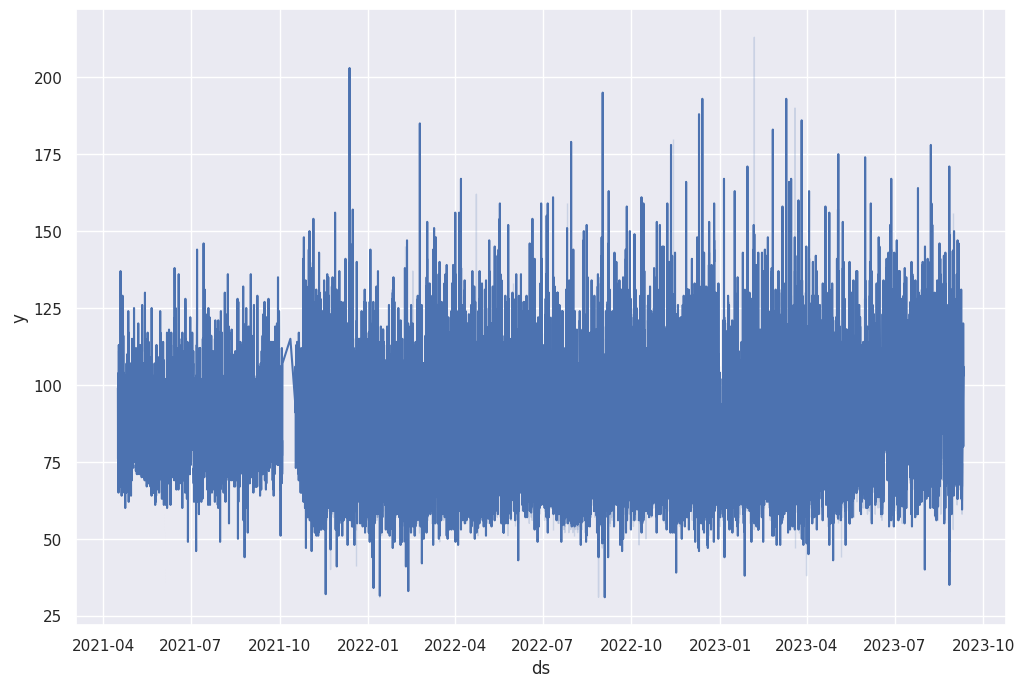

In [ ]:
sns.set(rc = {'figure.figsize' : (12, 8)})
sns.lineplot(x = df['ds'], y = df['y'])

In [ ]:
#help(Prophet)

In [21]:
model  = Prophet(interval_width = 0.99, yearly_seasonality = True, weekly_seasonality = True)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptkncfjzk/q6b9tv24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptkncfjzk/lw5npnfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42716', 'data', 'file=/tmp/tmptkncfjzk/q6b9tv24.json', 'init=/tmp/tmptkncfjzk/lw5npnfw.json', 'output', 'file=/tmp/tmptkncfjzk/prophet_modeldc172xtv/prophet_model-20230921002235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


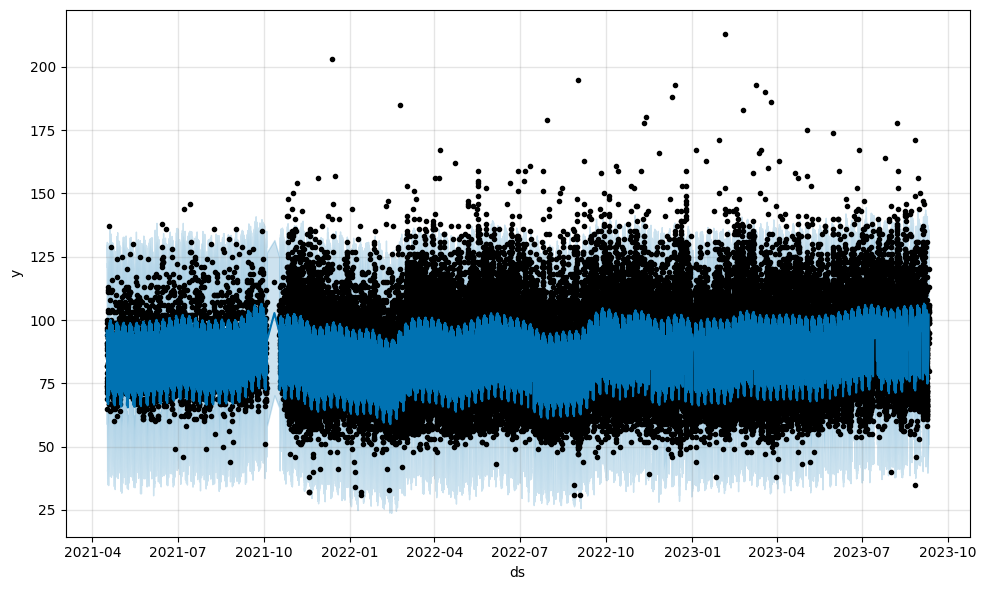

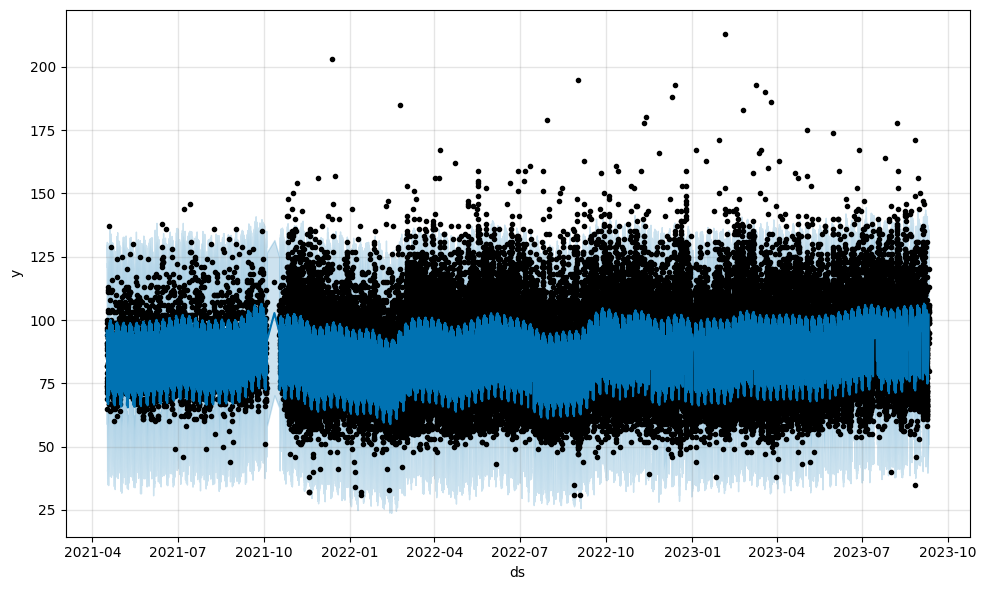

In [22]:
forecast = model.predict(df)

model.plot(forecast)

In [23]:
performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on = 'ds')

performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 9.072267061352976
The MAPE for the model is 0.11214389974631862


In [24]:
performance

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-04-16 10:00:00,88,95.137472,62.346339,124.916916
1,2021-04-16 15:40:00,86,82.628722,50.981160,116.453636
2,2021-04-16 21:55:00,71,69.490381,38.764718,99.682784
3,2021-04-17 02:31:00,79,86.178842,53.387117,116.323118
4,2021-04-17 07:15:00,113,91.099902,59.925076,123.400769
...,...,...,...,...,...
92522,2023-09-10 04:00:00,99,100.244634,68.583249,133.050929
92523,2023-09-10 04:50:00,99,101.979503,71.822888,135.721516
92524,2023-09-10 03:12:00,80,97.479818,65.556706,131.030813
92525,2023-09-10 04:15:00,101,100.907110,65.699915,134.048367


In [25]:
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
performance['anomaly'].value_counts()

0    90757
1     1770
Name: anomaly, dtype: int64

In [26]:
anomalies = performance[performance['anomaly']==1].sort_values(by = 'ds')

<Axes: xlabel='ds', ylabel='y'>

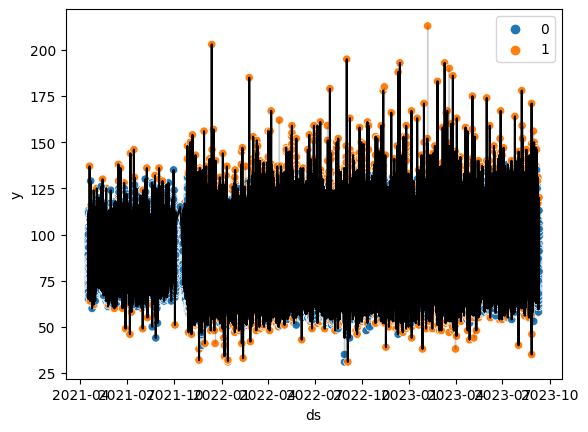

In [27]:
sns.scatterplot(x = 'ds', y = 'y', data = performance, hue = 'anomaly')
sns.lineplot(x = 'ds', y = 'y', data = performance, color = 'black')

In [28]:
performance[performance['anomaly']==1]

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
60,2021-04-21 23:55:00,116,80.731089,45.039360,115.160965,1
94,2021-04-27 02:12:00,124,90.711148,58.224278,121.414157,1
278,2021-05-21 08:31:00,125,92.642344,59.921290,122.834502,1
327,2021-05-14 09:51:00,130,93.675112,61.474210,127.063217,1
347,2021-05-01 01:12:00,115,79.902292,49.818795,111.152947,1
...,...,...,...,...,...,...
92245,2023-09-06 23:53:00,129,87.850824,53.878409,118.466383,1
92450,2023-09-07 22:32:00,117,82.184546,51.336120,115.580672,1
92477,2023-09-08 03:44:00,63,101.479591,70.029904,134.386341,1
92489,2023-09-08 09:55:00,68,102.281657,71.641921,135.248334,1
